In [ ]:
# Set up environment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_openml
import random
from sklearn.manifold import TSNE

# supress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")
#set all floats to max of 3 decimals
pd.options.display.float_format = "{:,.3f}".format

#1 Load the dataset and conduct any necessary preprocessing, such as normalizing the data.

In [ ]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [ ]:
indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


#2 Apply t-SNE to the data by setting n_components=2.

In [ ]:
tsne = TSNE(n_components=2)
tsne_components = pd.DataFrame(tsne.fit_transform(X), columns=['0', '1'])
tsne_components['target'] = y

#3 Using the two-dimensional t-SNE representation, draw a graph of the data by coloring and labeling the data points as you did in the checkpoint.

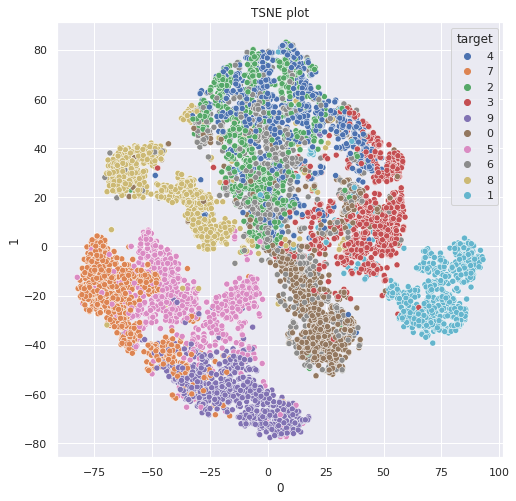

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='0', y='1', hue='target', data=tsne_components, ax=ax)
plt.title('TSNE plot')
plt.show()

#4 Do you think that the t-SNE solution is satisfactory? Can you easily distinguish between the different classes? Which algorithm produced better results, t-SNE or the PCA that you applied in the previous checkpoint's assignment?

We see some speration between clusters. It is better than PCA. 

#5 Now, play with the different perplexity values and apply t-SNE for each of them. Which perplexity value is best in terms of the two-dimensional representation clarity?

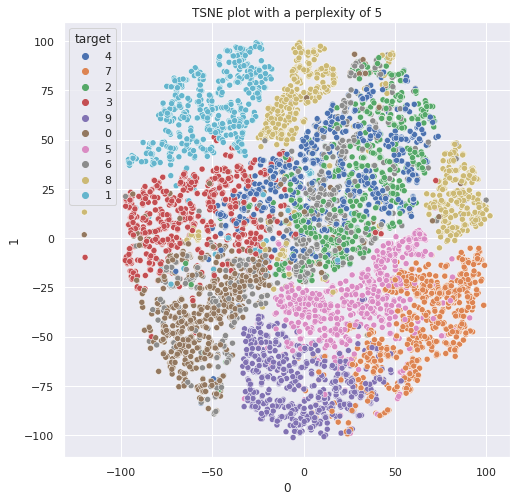

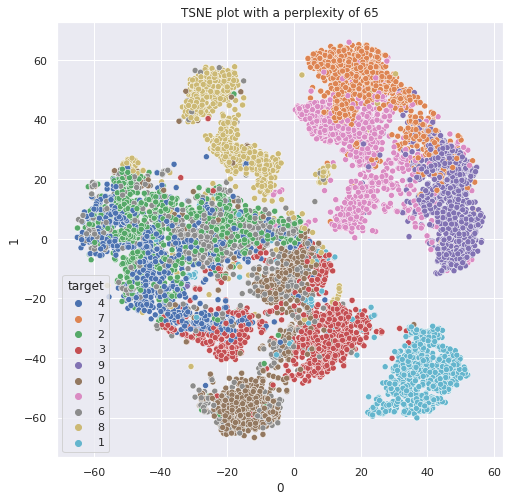

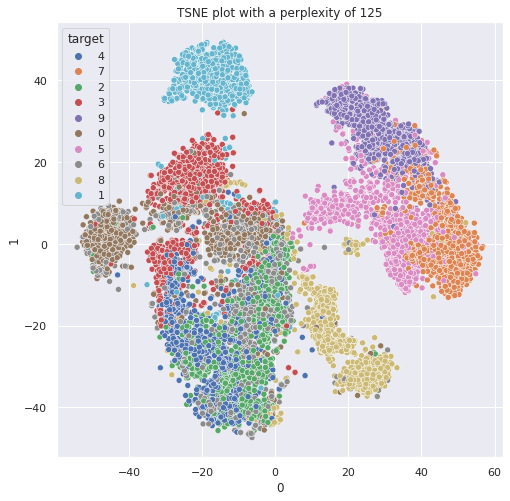

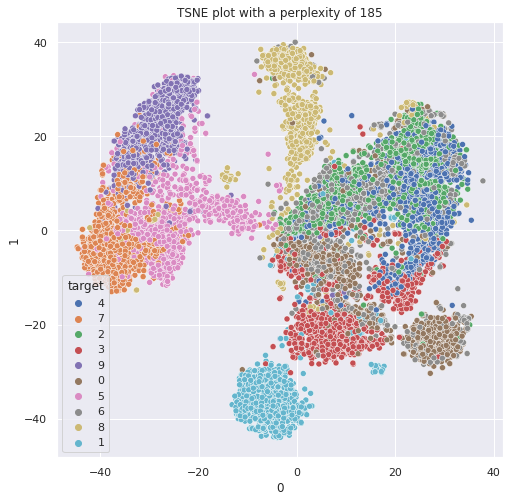

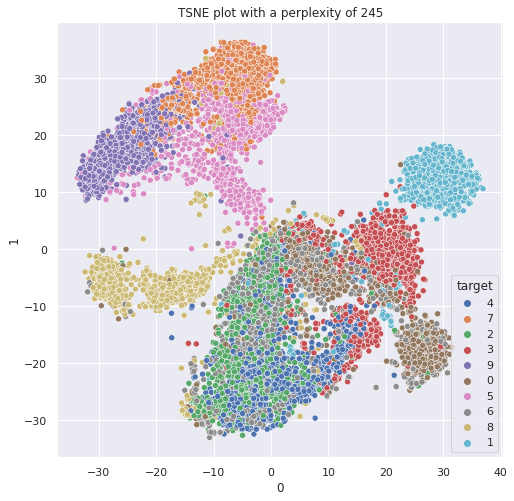

In [ ]:
for p in range (5,300,60):
  tsne = TSNE(perplexity=p, n_components=2)
  tsne_components = pd.DataFrame(tsne.fit_transform(X), columns=['0', '1'])
  tsne_components['target'] = y

  fig, ax = plt.subplots(figsize=(8,8))
  sns.scatterplot(x='0', y='1', hue='target', data=tsne_components, ax=ax)
  plt.title(f'TSNE plot with a perplexity of {p}')
  plt.show()
    

It seems like the higher perplexity more defined and tighter clusters. The data's structure doesn't seem to change much after a perplexity of 65. 